<a href="https://colab.research.google.com/github/FadyEhab-coder/ML-Projects/blob/main/Bitcoin_Pulse_%E2%80%94_Market%2C_Trends_%26_Fear_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bitcoin-pulse-market-trends-and-fear-dataset/Bitcoin Pulse  Hourly Dataset from Markets Trends and Fear.csv
/kaggle/input/bitcoin-pulse-market-trends-and-fear-dataset/merged_fix_to_hour.csv


In [ ]:
df = pd.read_csv('/kaggle/input/bitcoin-pulse-market-trends-and-fear-dataset/Bitcoin Pulse  Hourly Dataset from Markets Trends and Fear.csv')
df.head()

,timestamp,BNB_USDT_1h_open,BNB_USDT_1h_high,BNB_USDT_1h_low,BNB_USDT_1h_close,BNB_USDT_1h_volume,BTC_USDT_1h_open,BTC_USDT_1h_high,BTC_USDT_1h_low,BTC_USDT_1h_close,...,Open_sp500,Volume_sp500,btc_dominance,altcoin_market_cap,fear_greed_index,trend_bitcoin,trend_buy_crypto,google_trends_bitcoin,google_trends_buy_crypto,open_interest
0,2023-04-09 00:00:00,310.5739,311.1801,310.4821,311.1801,28.717,27943.39,28073.95,27930.31,28035.04,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
1,2023-04-09 01:00:00,311.1801,311.6257,311.1489,311.6132,15.980,28035.04,28080.00,28029.69,28075.72,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
2,2023-04-09 02:00:00,311.6132,311.8623,311.2814,311.2814,37.265,28075.72,28080.84,28027.47,28033.86,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
3,2023-04-09 03:00:00,311.2814,311.4965,311.0072,311.2450,22.836,28033.86,28047.09,28019.16,28025.87,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09
4,2023-04-09 04:00:00,311.2450,311.3736,311.0723,311.1659,44.535,28025.87,28038.02,28016.28,28036.28,...,4085.199951,0.0,19.43,6.817052e+11,61.0,38.0,17.0,38.0,17.0,8.142427e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17516 entries, 0 to 17515
Data columns (total 99 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 17516 non-null  object 
 1   BNB_USDT_1h_open          17516 non-null  float64
 2   BNB_USDT_1h_high          17516 non-null  float64
 3   BNB_USDT_1h_low           17516 non-null  float64
 4   BNB_USDT_1h_close         17516 non-null  float64
 5   BNB_USDT_1h_volume        17516 non-null  float64
 6   BTC_USDT_1h_open          17516 non-null  float64
 7   BTC_USDT_1h_high          17516 non-null  float64
 8   BTC_USDT_1h_low           17516 non-null  float64
 9   BTC_USDT_1h_close         17516 non-null  float64
 10  BTC_USDT_1h_volume        17516 non-null  float64
 11  DOGE_USDT_1h_open         17516 non-null  float64
 12  DOGE_USDT_1h_high         17516 non-null  float64
 13  DOGE_USDT_1h_low          17516 non-null  float64
 14  DOGE_U

In [ ]:
df.describe()

,BNB_USDT_1h_open,BNB_USDT_1h_high,BNB_USDT_1h_low,BNB_USDT_1h_close,BNB_USDT_1h_volume,BTC_USDT_1h_open,BTC_USDT_1h_high,BTC_USDT_1h_low,BTC_USDT_1h_close,BTC_USDT_1h_volume,...,Open_sp500,Volume_sp500,btc_dominance,altcoin_market_cap,fear_greed_index,trend_bitcoin,trend_buy_crypto,google_trends_bitcoin,google_trends_buy_crypto,open_interest
count,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,...,17516.000000,1.751600e+04,17516.000000,1.751600e+04,17516.000000,17516.000000,17516.000000,17516.000000,17516.000000,1.751600e+04
mean,449.579902,451.401201,447.613880,449.593638,1071.446362,56629.480715,56834.612843,56418.535820,56632.388149,606.837407,...,5103.633538,3.437815e+08,17.566967,1.027649e+12,58.765928,39.481388,25.748116,39.481388,25.748116,1.618888e+10
std,174.385817,175.265286,173.421428,174.384341,1562.150120,24184.088339,24293.718718,24072.415895,24183.700669,632.310603,...,634.970122,1.070437e+08,2.608727,3.379820e+11,16.268719,14.929269,15.799754,14.929269,15.799754,7.953643e+09
min,203.532800,204.606700,202.026800,203.532800,7.359880,24924.360000,24974.050000,24394.740000,24924.360000,7.718360,...,4050.679932,0.000000e+00,-2.890000,5.564477e+11,10.000000,23.000000,12.000000,23.000000,12.000000,6.981415e+09
25%,250.017400,251.210450,248.955800,250.017400,238.076145,30405.330000,30471.902500,30334.442500,30407.497500,192.564846,...,4482.609863,3.044420e+08,16.710000,6.765228e+11,48.000000,29.000000,17.000000,29.000000,17.000000,9.615329e+09
50%,523.525000,526.005000,521.190000,523.605000,595.928830,59415.210000,59643.950000,59193.790000,59420.930000,425.702958,...,5136.910156,3.474520e+08,17.710000,1.029207e+12,61.000000,34.000000,20.000000,34.000000,20.000000,1.489108e+10
75%,596.591850,598.382250,594.522500,596.591850,1310.539555,69356.970000,69519.157500,69147.797500,69358.085000,838.211382,...,5647.209961,3.927860e+08,19.070000,1.237942e+12,72.000000,48.000000,26.000000,48.000000,26.000000,1.905631e+10
max,783.950000,794.000000,775.850000,783.950000,44240.975550,108322.460000,109900.000000,107794.040000,108322.460000,15206.868300,...,6143.520020,1.005516e+09,28.890000,1.896919e+12,94.000000,100.000000,100.000000,100.000000,100.000000,3.675204e+10


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.sort_values('timestamp', inplace=True)

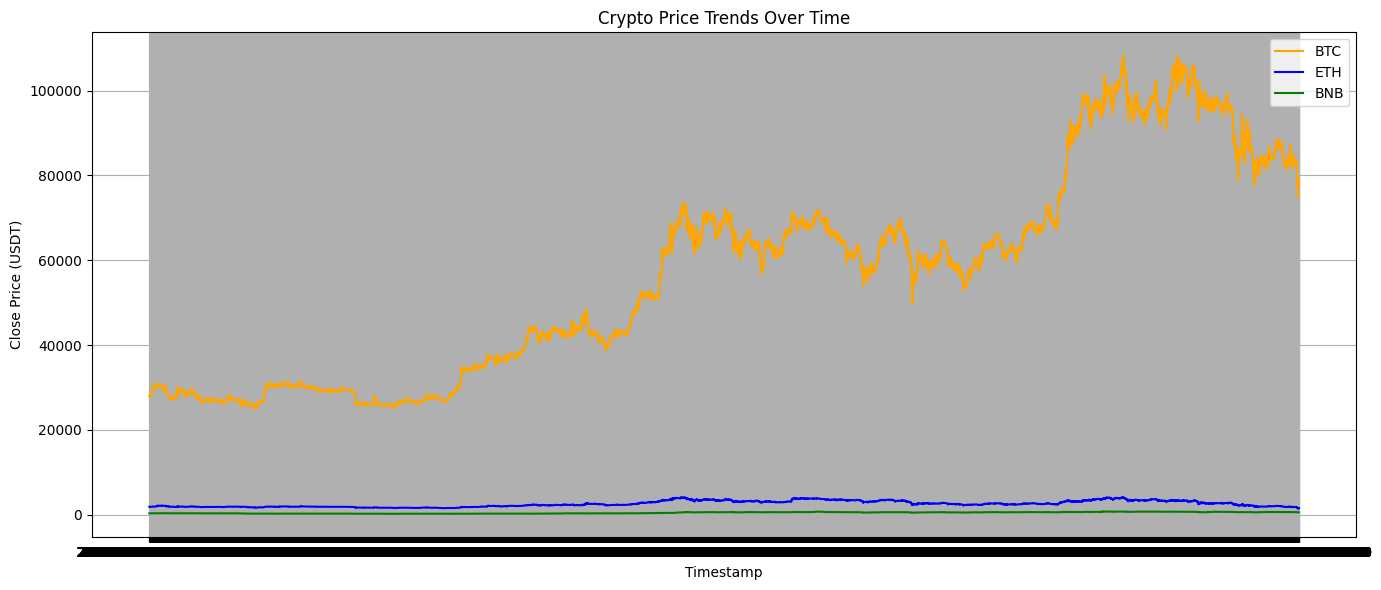

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['BTC_USDT_1h_close'], label='BTC', color='orange')
plt.plot(df['timestamp'], df['ETH_USDT_1h_close'], label='ETH', color='blue')
plt.plot(df['timestamp'], df['BNB_USDT_1h_close'], label='BNB', color='green')
plt.title('Crypto Price Trends Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Close Price (USDT)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

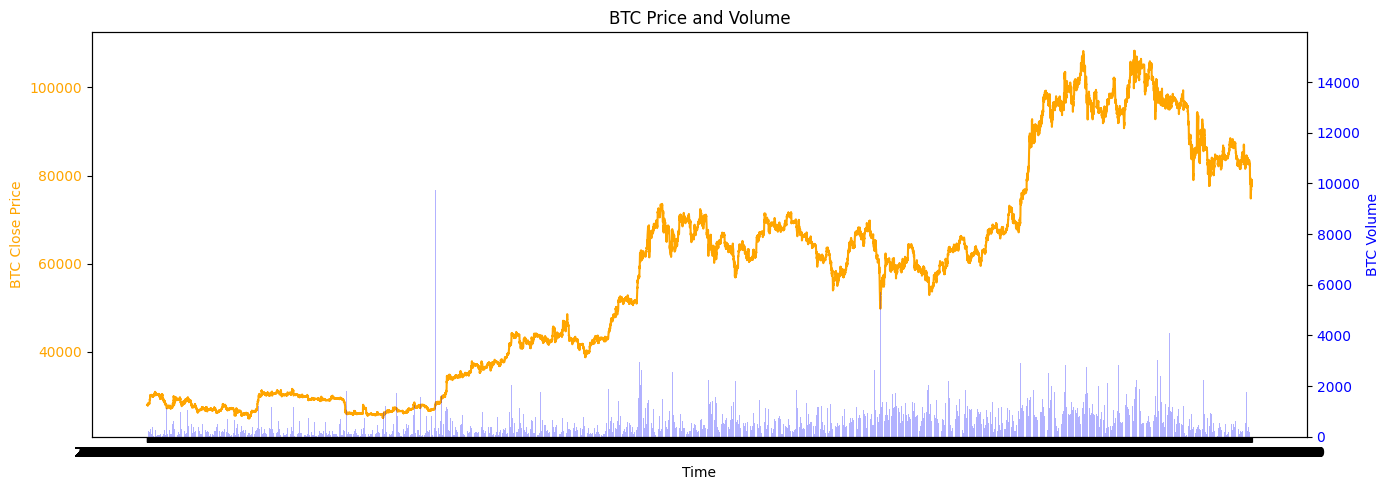

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.set_xlabel('Time')
ax1.set_ylabel('BTC Close Price', color='orange')
ax1.plot(df['timestamp'], df['BTC_USDT_1h_close'], color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
ax2.set_ylabel('BTC Volume', color='blue')
ax2.bar(df['timestamp'], df['BTC_USDT_1h_volume'], color='blue', alpha=0.3)
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('BTC Price and Volume')
plt.tight_layout()
plt.show()

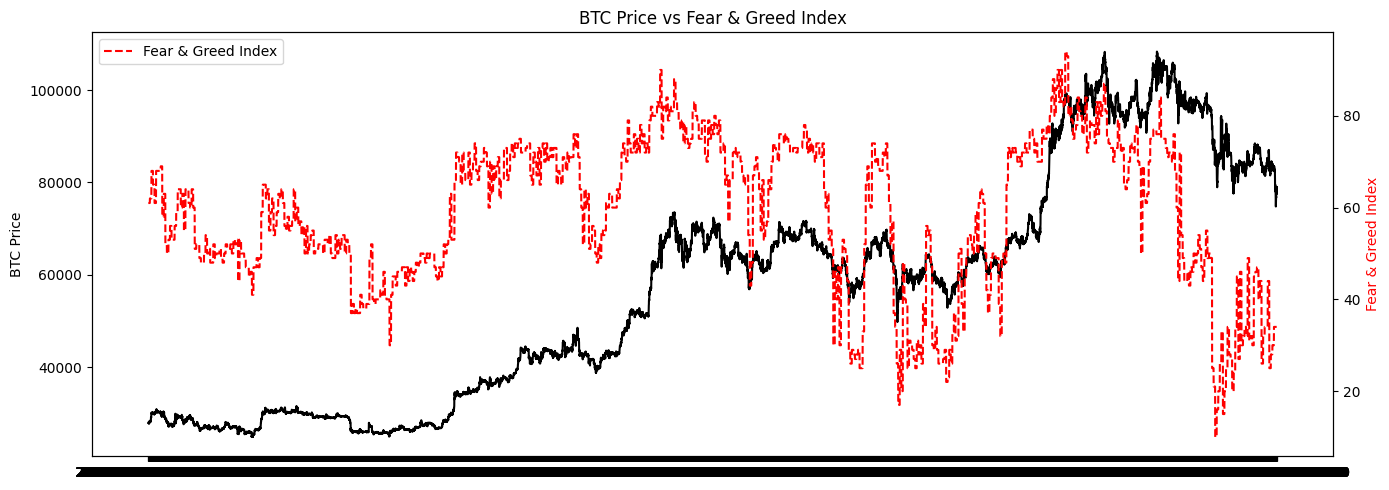

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.plot(df['timestamp'], df['BTC_USDT_1h_close'], color='black', label='BTC Close')
ax1.set_ylabel('BTC Price', color='black')

ax2 = ax1.twinx()
ax2.plot(df['timestamp'], df['fear_greed_index'], color='red', linestyle='--', label='Fear & Greed Index')
ax2.set_ylabel('Fear & Greed Index', color='red')

plt.title('BTC Price vs Fear & Greed Index')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:

btc_candle = go.Figure(data=[go.Candlestick(
    x=df['timestamp'],
    open=df['BTC_USDT_1h_open'],
    high=df['BTC_USDT_1h_high'],
    low=df['BTC_USDT_1h_low'],
    close=df['BTC_USDT_1h_close']
)])
btc_candle.update_layout(title='BTC Candlestick Chart', xaxis_rangeslider_visible=False)
btc_candle.show()

In [ ]:
X = df.drop(columns=['trend_bitcoin'])
y = df['trend_bitcoin']

In [ ]:
X['timestamp'] = pd.to_datetime(X['timestamp'])
X['hour'] = X['timestamp'].dt.hour
X['day_of_week'] = X['timestamp'].dt.dayofweek
X['month'] = X['timestamp'].dt.month

# Drop the original 'timestamp' column if no longer needed
X = X.drop('timestamp', axis=1)

In [ ]:
X.head()

,BNB_USDT_1h_open,BNB_USDT_1h_high,BNB_USDT_1h_low,BNB_USDT_1h_close,BNB_USDT_1h_volume,BTC_USDT_1h_open,BTC_USDT_1h_high,BTC_USDT_1h_low,BTC_USDT_1h_close,BTC_USDT_1h_volume,...,btc_dominance,altcoin_market_cap,fear_greed_index,trend_buy_crypto,google_trends_bitcoin,google_trends_buy_crypto,open_interest,hour,day_of_week,month
0,310.5739,311.1801,310.4821,311.1801,28.717,27943.39,28073.95,27930.31,28035.04,57.560631,...,19.43,6.817052e+11,61.0,17.0,38.0,17.0,8.142427e+09,0,6,4
1,311.1801,311.6257,311.1489,311.6132,15.980,28035.04,28080.00,28029.69,28075.72,21.191172,...,19.43,6.817052e+11,61.0,17.0,38.0,17.0,8.142427e+09,1,6,4
2,311.6132,311.8623,311.2814,311.2814,37.265,28075.72,28080.84,28027.47,28033.86,38.007310,...,19.43,6.817052e+11,61.0,17.0,38.0,17.0,8.142427e+09,2,6,4
3,311.2814,311.4965,311.0072,311.2450,22.836,28033.86,28047.09,28019.16,28025.87,9.248042,...,19.43,6.817052e+11,61.0,17.0,38.0,17.0,8.142427e+09,3,6,4
4,311.2450,311.3736,311.0723,311.1659,44.535,28025.87,28038.02,28016.28,28036.28,13.992617,...,19.43,6.817052e+11,61.0,17.0,38.0,17.0,8.142427e+09,4,6,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


🔍 Logistic Regression
Accuracy: 94.29 %
classification report - Logistic Regression               precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.89      0.92      0.91       101
           2       0.92      0.96      0.94       101
           3       0.99      0.93      0.96       168
           4       0.91      0.93      0.92       134
           5       0.91      0.94      0.93       134
           6       0.92      0.94      0.93       269
           7       0.89      0.77      0.83       168
           8       0.89      0.91      0.90       202
           9       0.92      0.97      0.94       202
          10       0.90      0.89      0.89       134
          11       0.97      0.99      0.98       202
          12       0.88      0.90      0.89       168
          13       0.90      0.93      0.92       101
          14       0.94      0.83      0.88       101
          15       0.93      0.97      0.95       

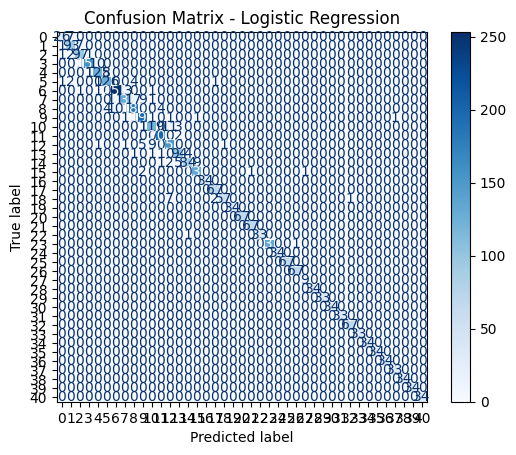


🔍 Random Forest
Accuracy: 100.0 %
classification report - Random Forest               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00       168
           4       1.00      1.00      1.00       134
           5       1.00      1.00      1.00       134
           6       1.00      1.00      1.00       269
           7       1.00      1.00      1.00       168
           8       1.00      1.00      1.00       202
           9       1.00      1.00      1.00       202
          10       1.00      1.00      1.00       134
          11       1.00      1.00      1.00       202
          12       1.00      1.00      1.00       168
          13       1.00      1.00      1.00       101
          14       1.00      1.00      1.00       101
          15       1.00      1.00      1.00       134
        

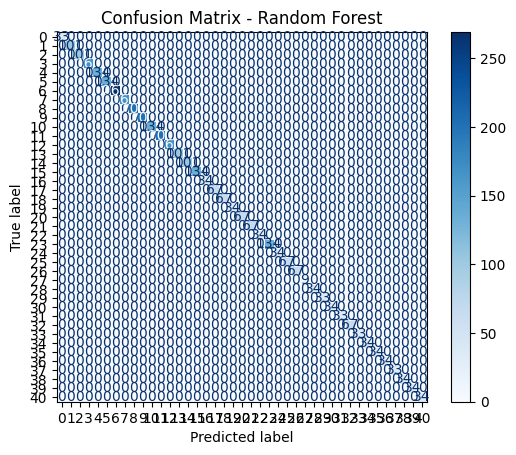


🔍 SVM
Accuracy: 89.78 %
classification report - SVM               precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.83      0.90      0.87       101
           2       0.80      0.91      0.85       101
           3       0.90      0.81      0.85       168
           4       0.87      0.93      0.90       134
           5       0.84      0.91      0.87       134
           6       0.90      0.94      0.92       269
           7       0.85      0.73      0.79       168
           8       0.88      0.81      0.84       202
           9       0.82      0.93      0.87       202
          10       0.90      0.84      0.87       134
          11       0.89      0.82      0.86       202
          12       0.86      0.96      0.91       168
          13       0.90      0.77      0.83       101
          14       0.86      0.78      0.82       101
          15       0.86      0.98      0.91       134
          16       0.94     

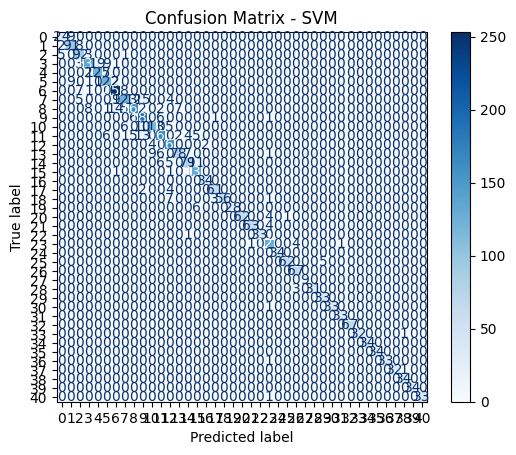


🔍 Naive Bayes
Accuracy: 100.0 %
classification report - Naive Bayes               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00       168
           4       1.00      1.00      1.00       134
           5       1.00      1.00      1.00       134
           6       1.00      1.00      1.00       269
           7       1.00      1.00      1.00       168
           8       1.00      1.00      1.00       202
           9       1.00      1.00      1.00       202
          10       1.00      1.00      1.00       134
          11       1.00      1.00      1.00       202
          12       1.00      1.00      1.00       168
          13       1.00      1.00      1.00       101
          14       1.00      1.00      1.00       101
          15       1.00      1.00      1.00       134
          16

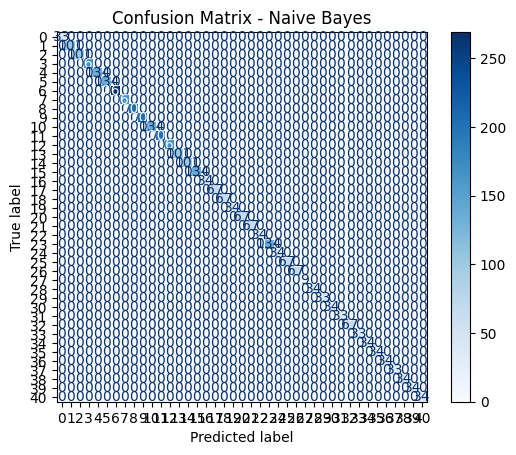


🔍 KNN
Accuracy: 95.78 %
classification report - KNN               precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.93      0.99      0.96       101
           2       0.94      0.99      0.97       101
           3       0.93      0.98      0.96       168
           4       0.96      0.97      0.97       134
           5       0.94      0.94      0.94       134
           6       0.97      0.99      0.98       269
           7       0.97      0.95      0.96       168
           8       0.95      0.95      0.95       202
           9       0.96      0.94      0.95       202
          10       0.96      0.96      0.96       134
          11       0.96      0.93      0.95       202
          12       0.95      0.96      0.95       168
          13       0.92      0.93      0.93       101
          14       0.91      0.97      0.94       101
          15       0.98      0.93      0.95       134
          16       1.00     

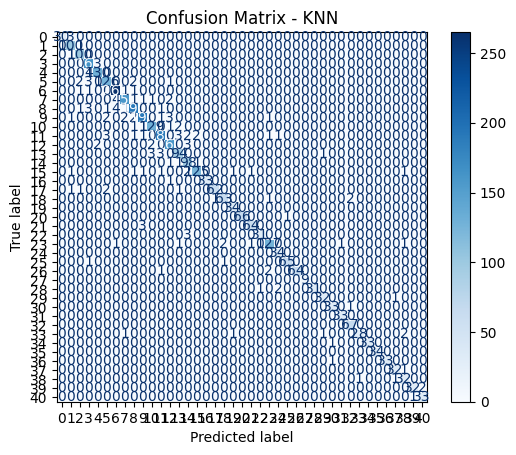


🔍 Decision Tree
Accuracy: 99.97 %
classification report - Decision Tree               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00       168
           4       1.00      1.00      1.00       134
           5       1.00      1.00      1.00       134
           6       1.00      1.00      1.00       269
           7       1.00      1.00      1.00       168
           8       1.00      1.00      1.00       202
           9       1.00      1.00      1.00       202
          10       1.00      1.00      1.00       134
          11       1.00      1.00      1.00       202
          12       1.00      1.00      1.00       168
          13       1.00      1.00      1.00       101
          14       1.00      1.00      1.00       101
          15       1.00      1.00      1.00       134
        

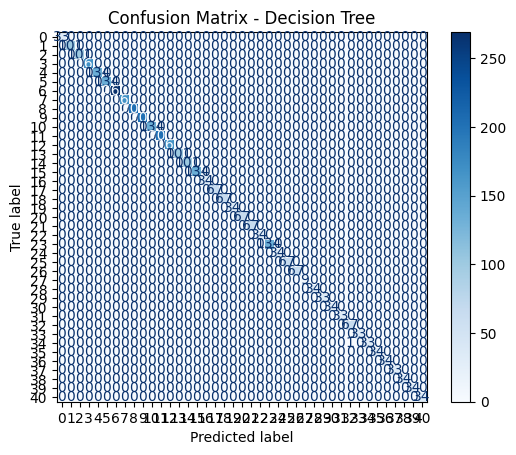


🔍 XGBoost
Accuracy: 100.0 %
classification report - XGBoost               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00       168
           4       1.00      1.00      1.00       134
           5       1.00      1.00      1.00       134
           6       1.00      1.00      1.00       269
           7       1.00      1.00      1.00       168
           8       1.00      1.00      1.00       202
           9       1.00      1.00      1.00       202
          10       1.00      1.00      1.00       134
          11       1.00      1.00      1.00       202
          12       1.00      1.00      1.00       168
          13       1.00      1.00      1.00       101
          14       1.00      1.00      1.00       101
          15       1.00      1.00      1.00       134
          16       1

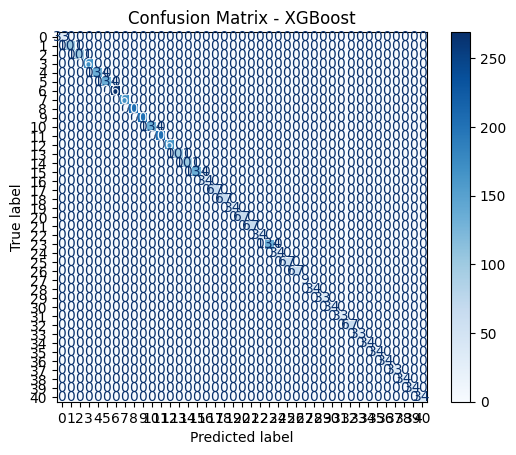

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22126
[LightGBM] [Info] Number of data points in the train set: 14012, number of used features: 93
[LightGBM] [Info] Start training from score -4.642395
[LightGBM] [Info] Start training from score -3.548733
[LightGBM] [Info] Start training from score -3.548733
[LightGBM] [Info] Start training from score -3.037411
[LightGBM] [Info] Start training from score -3.259811
[LightGBM] [Info] Start training from score -3.259811
[LightGBM] [Info] Start training from score -2.567593
[LightGBM] [Info] Start training from score -3.037411
[LightGBM] [Info] Start training from score -2.855586
[LightGBM] [Info] Start training from score -2.855586
[LightGBM] [Info] Start training from score -3.259811
[LightGBM] [Info] Start training from score -2.855586
[LightGBM] [Info] Start training from score -3.037411
[LightGB

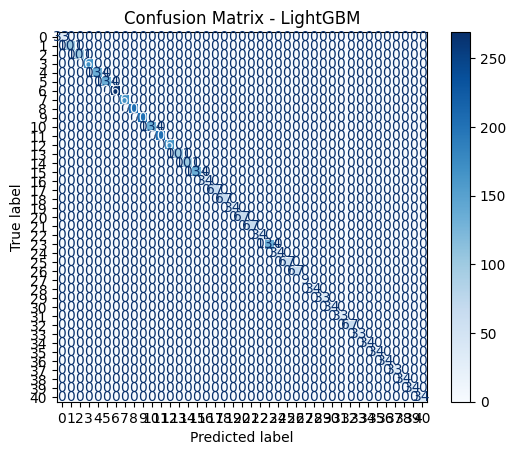


🔍 AdaBoost
Accuracy: 19.18 %
classification report - AdaBoost               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.00      0.00      0.00       101
           2       0.00      0.00      0.00       101
           3       0.31      1.00      0.48       168
           4       0.00      0.00      0.00       134
           5       0.00      0.00      0.00       134
           6       0.00      0.00      0.00       269
           7       0.00      0.00      0.00       168
           8       0.55      1.00      0.71       202
           9       0.00      0.00      0.00       202
          10       0.00      0.00      0.00       134
          11       0.00      0.00      0.00       202
          12       0.17      1.00      0.29       168
          13       0.00      0.00      0.00       101
          14       0.00      0.00      0.00       101
          15       0.00      0.00      0.00       134
          16      

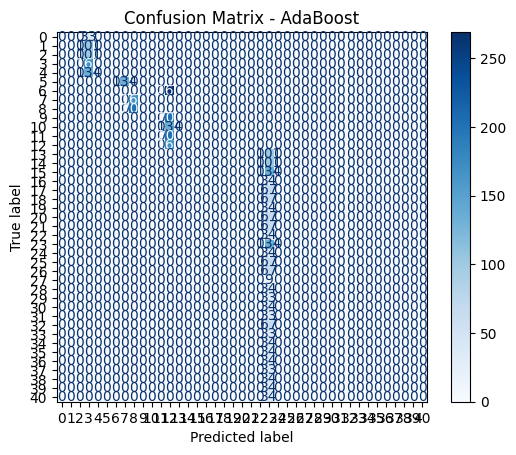


🔍 Gradient Boosting
Accuracy: 100.0 %
classification report - Gradient Boosting               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00       168
           4       1.00      1.00      1.00       134
           5       1.00      1.00      1.00       134
           6       1.00      1.00      1.00       269
           7       1.00      1.00      1.00       168
           8       1.00      1.00      1.00       202
           9       1.00      1.00      1.00       202
          10       1.00      1.00      1.00       134
          11       1.00      1.00      1.00       202
          12       1.00      1.00      1.00       168
          13       1.00      1.00      1.00       101
          14       1.00      1.00      1.00       101
          15       1.00      1.00      1.00       134


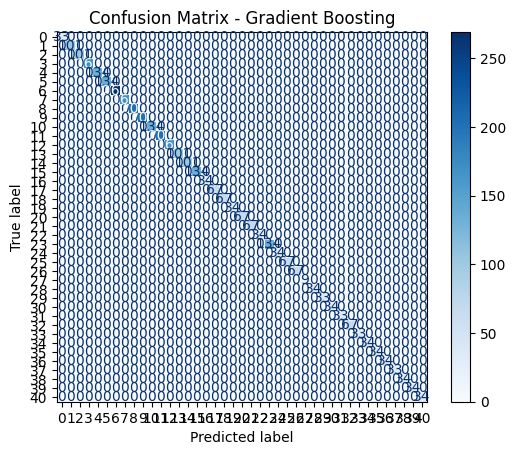

In [ ]:

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train_encoded)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test_encoded, preds)
    accuracy_results[name] = round(acc * 100, 2)

    print(f"\n🔍 {name}")
    print("Accuracy:", round(acc * 100, 2), "%")

    cr = classification_report(y_test_encoded, preds)
    print(f'classification report - {name}', cr)
    cm = confusion_matrix(y_test_encoded, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.grid(False)
    plt.show()

In [ ]:
print("\n📊 Model Accuracy Summary:")
for name, acc in accuracy_results.items():
    print(f"{name}: {acc}%")


📊 Model Accuracy Summary:
Logistic Regression: 94.29%
Random Forest: 100.0%
SVM: 89.78%
Naive Bayes: 100.0%
KNN: 95.78%
Decision Tree: 99.97%
XGBoost: 100.0%
LightGBM: 100.0%
AdaBoost: 19.18%
Gradient Boosting: 100.0%
